In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import plotly.express as px
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')


# Load data
#from google.colab import drive

#drive.mount('/content/drive')

#path = "/content/drive/MyDrive/Colab Notebooks/cleaned_data.csv"
#df= pd.read_csv(path)

df= pd.read_csv("cleaned_data.csv")


train, test = train_test_split(df, test_size=0.2)

#train =df[1:6552].values
#test=df[6553:7272].values
#train= pd.read_csv("cleaned_data.csv")
#test=pd.read_csv("cleaned_data.csv")

# Fit Exponential Smoothing model
model = ExponentialSmoothing(train['Total_deaths'].values)
model_fit = model.fit()


# Make predictions
#forecast = model_fit.forecast(steps=forecast_steps)

# New Section

In [2]:
#print(model_fit.summary())

In [3]:
train.head()

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
46531,Africa,Eritrea,2020-07-25,263,2,1.714,1,0,0.000,73.026,...,19.3,3.607,2.171,0.2,311.110,6.05,0.2,11.4,0,66.32
26286,Asia,Cambodia,2021-11-01,118613,91,103.571,2794,6,7.286,6999.285,...,25.6,4.412,2.385,0.2,270.892,4.00,2.0,33.7,0,69.82
60204,Europe,Greece,2021-06-04,407857,1106,1279.857,12218,34,31.857,39327.640,...,45.3,20.396,14.524,1.5,175.695,4.55,35.3,52.0,4,82.24
99426,Europe,Moldova,2020-10-16,65860,784,718.143,1549,19,15.286,16366.698,...,37.6,10.864,6.955,0.2,408.502,5.72,5.9,44.6,5,71.90
8447,Africa,Asia,2020-11-30,16791025,115525,124291.000,292249,1635,1708.286,3589.018,...,32.4,6.933,3.053,0.2,152.783,2.42,1.9,24.7,0,76.88


In [6]:
len(df) 

166326

The above output shows that we have total 4681 rows.

The column 'Total Cases’ and ' total Death' contains significant information about the COVID cases. They will be useful to get details about the COVID

#**Assesment of Data Quality**

In [7]:
# identifying issues in all the columns

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Check for incorrect data types
incorrect_dtypes = df.dtypes[df.dtypes == 'object']
print(incorrect_dtypes)

# Check for outliers
outliers = df[(df > 3*df.std()).any(axis=1)].dropna(how='all')
print(outliers)

Continent                                     0
Location                                      0
Date                                          0
Total_Cases                                   0
New_Cases                                     0
New cases smoothed                            0
Total_deaths                                  0
New deaths                                    0
new deaths smoothed                           0
total cases per million                       0
new cases per million                         0
total deaths per million                      0
reproduction rate                             0
icu patients                                  0
hosp patients                                 0
hosp patients per million                     0
weekly icu admissions                         0
weekly hosp admissions                        0
new tests                                     0
total tests                                   0
new tests per thousand                  

**Checking the completeness, accuracy, consistency, and uniformity of the data.**

**Completeness:** Check if all the necessary fields have values. You can use the .isnull() method in Pandas to find missing values.

**Accuracy:** Check if the values are correct. You can use regular expressions, data validation functions, or data profiling techniques to identify incorrect values.

**Consistency:** Check if the data is consistent with the constraints and business rules. For example, you can check if the values in a date column are in the correct date format, or if the values in an age column are positive numbers.

**Uniformity:** Check if the data is uniform across all columns. For example, you can check if the values in a phone number column are formatted in the same way.

#**Data Validation**

In [11]:
# Load the data into a Pandas data frame
# Define the validation tests
def validate_data(df):
    # Check if all required columns are present
    required_columns = ['Total_Cases', 'Total_deaths']
    missing_columns = [col for col in required_columns if col not in df.columns]
    assert not missing_columns, f"The following columns are missing: {missing_columns}"

    # Check if all values in 'column1' are positive
    assert (df['Total_Cases'] >= 0).all(), "Values in 'Total Cases' should be positive"

    # Check if all values in 'column2' are within a specific range
    min_value = 0
    max_value = 99999999
    assert ((df['Total_deaths'] >= min_value) & (df['Total_deaths'] <= max_value)).all(), \
           f"Values in 'Total deaths' should be between {min_value} and {max_value}"

    # Check if all values in 'column3' are unique
    # assert df['Continent'].is_unique, "Values in 'Continent' should not be unique"

# Run the validation tests
validate_data(df)

# If all tests pass, the code will continue to run
print("Data validation passed successfully!")

Data validation passed successfully!


#**The output above shows all the records are in the range we specified. Let’s have a look at the dataframe summary to check the same.**

#**Data Fitness**

In [12]:
# Get a quick summary of the data
summary = df.describe()

print(summary)

# Get a quick overview of the data
overview = df.info()

print(overview)

        Total_Cases     New_Cases  New cases smoothed  Total_deaths  \
count  1.663260e+05  1.663260e+05        1.663260e+05  1.663260e+05   
mean   2.489799e+06  1.134871e+04        1.120568e+04  5.042698e+04   
std    1.529680e+07  8.362675e+04        8.130804e+04  2.831654e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    1.590000e+03  0.000000e+00        4.857000e+00  2.200000e+01   
50%    2.365700e+04  7.100000e+01        9.150000e+01  3.690000e+02   
75%    2.844440e+05  1.013000e+03        1.056714e+03  5.269000e+03   
max    4.451295e+08  4.206334e+06        3.444237e+06  5.995245e+06   

          New deaths  new deaths smoothed  total cases per million  \
count  166326.000000        166326.000000            166326.000000   
mean      149.695496           148.861789             29534.447829   
std       780.429560           760.934729             51261.187951   
min         0.000000             0.000000                 0.001000   
25%       

#**Data fitness for answering research questions**

#1. Which machine learning timeseries Model works best for forecasting Covid-19 cases?

As if now, we have used two models i,e, ARIMA and Holt Winters Method. 

**Holt-Winters Method:** The Holt-Winters method is an extension of exponential smoothing that considers trends in the data. 
It uses a weighted average of past observations, as well as a smoothed estimate of the trend, to make predictions about future observations.

**ARIMA:** AutoRegressive Integrated Moving Average is a popular model for time series forecasting.
It models the dependencies between an observation and a residual error, and the dependencies between residual errors at prior time steps.

#2. Does the required data in the dataset is enough to make a forecasting of COVID-19?
Yes, in the dataset, we have enough number of information, which we can use in predicting the COVID-19 cases, deaths etc other important details.
We have data from 2019 till 2022, by which we can predict the COVID-19 trend in upcoming year i.e.2023

#3. Dataset having valid data, without null or outliers?
Yes, dataset is free from null values and outliers, as validated above.





#**Ethical Assessment for data collection and usage**
**Data Science Ethics Checklist**

**CONSENT:**We are using this data only for the study purpose for that we must do citing or provide like to this dataset as a reference.We have not retrieved any personal information while extracting the forecasting timeseries dataset and the usage is very clear as well.

**CLARITY:**We are using this data only for model training and we are not going to share this data with any commercial authority or farm. 

**CONSISTENCY:**This dataset is reliable as refered from Kaggel.

**CONTROL:** We have no control on this dataset as we refered this from Kaggle.

**CONSEQUENCES:**There will no such consequences of this dataset and we are using this for study purpose

In [13]:
# EDA Part beings

In [14]:
df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total_Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,Total_Cases
Continent,
Africa,1457133251
Europe,161178240
Asia,120618922
North America,93398363
South America,54621148
Oceania,3814291


In [15]:
train.sample(6)

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
129526,Europe,San Marino,2021-04-16,5010,6,11.143,86,0,0.143,147309.615,...,32.4,6.933,3.053,0.2,152.783,5.64,1.9,24.7,3,84.97
33223,Africa,Comoros,2020-11-02,545,0,4.000,7,0,0.000,613.424,...,20.4,2.963,1.726,18.1,261.516,11.88,4.4,23.6,2,64.32
72674,Asia,Iran,2022-02-26,7030943,7039,15065.429,136390,224,227.429,82688.998,...,32.4,5.440,3.182,0.2,270.308,9.59,0.8,21.1,1,76.68
109367,North America,Nicaragua,2021-04-07,6727,0,7.143,179,0,0.143,1003.673,...,27.3,5.445,3.519,3.2,137.016,11.47,1.9,24.7,0,74.48
65725,North America,Haiti,2021-08-07,20326,0,35.571,563,0,2.571,1761.095,...,24.3,4.800,2.954,23.5,430.548,6.65,2.9,23.1,0,64.00
122820,Asia,Qatar,2021-08-23,231126,289,242.571,601,0,0.000,78868.489,...,31.9,1.307,0.617,0.2,176.690,16.52,0.8,26.9,1,80.23


In [16]:
test.sample(6)

,Continent,Location,Date,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
56328,Africa,Gambia,2020-12-14,3782,0,1.714,123,0,0.000,1520.746,...,17.5,2.339,1.417,10.1,331.430,1.91,0.7,31.2,1,62.05
31283,South America,Chile,2021-06-29,1553774,2637,3977.286,32489,35,114.143,80873.658,...,35.4,11.087,6.938,1.3,127.993,8.46,34.2,41.5,2,80.18
59021,Europe,Gibraltar,2020-03-20,10,0,1.286,1,0,0.000,296.815,...,32.4,6.933,3.053,0.2,152.783,2.42,1.9,24.7,0,79.93
118082,Oceania,Papua New Guinea,2021-01-10,811,0,1.714,9,0,0.000,88.935,...,22.6,3.808,2.142,0.2,561.494,17.65,23.5,48.8,0,64.50
91315,Asia,Macao,2021-02-13,48,0,0.000,1,0,0.000,72.905,...,39.2,9.798,4.991,0.2,152.783,2.42,1.9,24.7,0,84.24
103135,Africa,Morocco,2020-12-07,381188,1531,3550.286,6320,75,67.714,10207.261,...,29.6,6.769,4.209,1.0,419.146,7.14,0.8,47.1,1,76.68


In [17]:
df = train.fillna('NA').groupby(['Continent','Location','Date'])['Total_Cases'].sum() \
                          .groupby(['Continent','Location']).max().sort_values() \
                          .groupby(['Continent']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10)
top10

,Total_Cases
Continent,
Africa,1457133251
Europe,161178240
Asia,120618922
North America,93398363
South America,54621148
Oceania,3814291


In [19]:
fig = px.bar(top10, x=top10.index, y='Total_Cases', labels={'x':'Continent'},
             color="Total_Cases", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Total COVID-19 cases by Continent')
fig.show()

From the above graph, we can say that Africa has most Total cases and followed by Europe. The virus has began at China but virus is showing a greater impact on Africa and Europe and Asia

In [22]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total_Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Africa') &(df_by_date.Date >= '2020-03-01')].sort_values('Total_Cases',ascending = False), 
             x='Date', y='Total_Cases', color="Total_Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Africa')
fig.show()

In [24]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Continent','Date'])['Total_Cases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Continent'] == 'Europe') &(df_by_date.Date >= '2020-03-01')].sort_values('Total_Cases',ascending = False), 
             x='Date', y='Total_Cases', color="Total_Cases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Total COVID-19 cases per day in Europe')
fig.show()

In [25]:
df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
4668,2022-03-05,Asia,99507725,549447,506158.143,1007878,922,888.002,3.466377e+06,23201.189,...,1115.8,221.099,136.419,135.0,10841.838,336.26,162.1,1371.3,74,2756.68
4669,2022-03-05,Europe,148273248,476712,519496.858,1575783,1649,1885.283,1.085104e+07,35893.198,...,1693.4,664.599,421.815,22.7,9197.807,259.07,827.7,1420.5,175,3349.92
4670,2022-03-05,North America,93212870,32314,65726.713,1383885,689,1763.145,3.552958e+06,1598.867,...,915.9,248.258,146.533,63.3,5267.962,281.28,115.2,659.0,40,2136.18
4671,2022-03-05,Oceania,462785,16002,21994.427,2608,6,5.572,6.191833e+05,5552.383,...,341.6,82.413,46.474,57.3,3959.949,179.72,76.4,352.6,9,881.59
4672,2022-03-05,South America,48551608,91027,72627.572,1123193,944,694.002,1.288794e+06,2187.697,...,330.4,91.681,57.920,21.9,2123.647,86.29,99.4,282.6,19,823.80


In [ ]:
###Time Evaluation

In [26]:
df.head()

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
0,2020-01-01,North America,1,0,0.0,1,0,0.0,33251.232,0.0,...,29.3,6.857,4.321,2.5,152.783,13.06,6.9,21.4,1,75.05
1,2020-01-01,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.50,16.2,27.7,5,76.67
2,2020-01-02,North America,1,0,0.0,1,0,0.0,33251.232,0.0,...,29.3,6.857,4.321,2.5,152.783,13.06,6.9,21.4,1,75.05
3,2020-01-02,South America,1,0,0.0,1,0,0.0,33251.232,0.0,...,31.9,11.198,7.441,0.6,191.032,5.50,16.2,27.7,5,76.67
4,2020-01-04,Asia,1,0,0.0,1,0,0.0,33251.232,0.0,...,40.1,11.373,6.890,0.1,109.861,7.04,1.9,38.8,2,77.15


In [27]:
df=train.groupby(['Date','Continent']).agg('sum').reset_index()
df.tail(5)

,Date,Continent,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
4668,2022-03-05,Asia,99507725,549447,506158.143,1007878,922,888.002,3.466377e+06,23201.189,...,1115.8,221.099,136.419,135.0,10841.838,336.26,162.1,1371.3,74,2756.68
4669,2022-03-05,Europe,148273248,476712,519496.858,1575783,1649,1885.283,1.085104e+07,35893.198,...,1693.4,664.599,421.815,22.7,9197.807,259.07,827.7,1420.5,175,3349.92
4670,2022-03-05,North America,93212870,32314,65726.713,1383885,689,1763.145,3.552958e+06,1598.867,...,915.9,248.258,146.533,63.3,5267.962,281.28,115.2,659.0,40,2136.18
4671,2022-03-05,Oceania,462785,16002,21994.427,2608,6,5.572,6.191833e+05,5552.383,...,341.6,82.413,46.474,57.3,3959.949,179.72,76.4,352.6,9,881.59
4672,2022-03-05,South America,48551608,91027,72627.572,1123193,944,694.002,1.288794e+06,2187.697,...,330.4,91.681,57.920,21.9,2123.647,86.29,99.4,282.6,19,823.80


In [29]:
def pltCountry_cases(Total_Cases,*argv):
    f, ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv: 
        country=df.loc[(df['Continent']==a)]
        plt.plot(country['Date'],country['Total_Cases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Evolution of the number of cases')

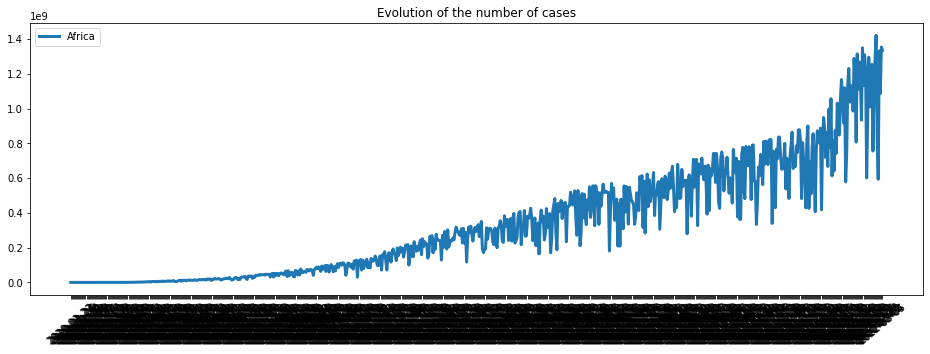

In [30]:
pltCountry_cases('Total_Cases','Africa')


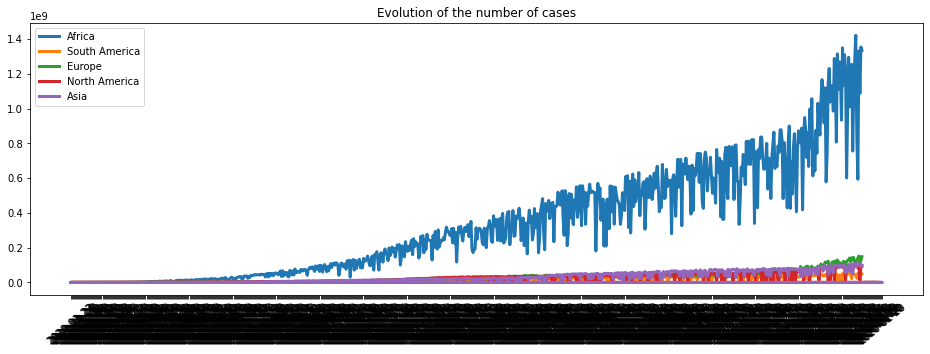

In [31]:
pltCountry_cases('Total_Cases','Africa','South America', 'Europe', 'North America', 'Asia')



In [34]:
df.describe()

,Total_Cases,New_Cases,New cases smoothed,Total_deaths,New deaths,new deaths smoothed,total cases per million,new cases per million,total deaths per million,reproduction rate,...,median age,aged 65 older,aged 70 older,extreme poverty,cardiovasc death rate,diabetes prevalence,female smokers,male smokers,hospital beds per thousand,life expectancy
count,4.673000e+03,4.673000e+03,4.673000e+03,4.673000e+03,4673.000000,4673.000000,4.673000e+03,4673.000000,4673.000000,4673.000000,...,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000,4673.000000
mean,7.113110e+07,3.249264e+05,3.211122e+05,1.437490e+06,4265.472930,4243.019244,8.415000e+05,4646.360536,13357.290978,28.636608,...,879.491141,240.269649,145.325690,215.149390,6869.502328,211.681813,212.594095,848.249607,53.725230,2101.098688
std,1.749021e+08,9.322750e+05,9.091021e+05,3.213426e+06,8281.025522,8074.263308,1.359866e+06,11473.771709,17093.149744,16.832390,...,512.594886,183.999490,117.689398,392.112963,4568.009218,101.583667,242.355068,534.515303,52.151237,1194.124965
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,3.000000e-02,0.000000,0.116000,1.020000,...,28.600000,6.224000,3.284000,0.100000,86.060000,2.420000,1.900000,16.500000,0.000000,67.440000
25%,3.846750e+05,8.258000e+03,7.688858e+03,8.685000e+03,178.000000,180.428000,6.681244e+04,437.551000,2542.020000,11.710000,...,336.300000,89.501000,53.892000,22.800000,2272.677000,91.280000,90.100000,283.800000,16.000000,833.180000
50%,1.281897e+07,5.975700e+04,6.063843e+04,3.338600e+05,1120.000000,1177.572000,3.220715e+05,1585.317000,6852.821000,29.420000,...,955.900000,229.210000,129.700000,42.200000,5478.601000,243.420000,120.134000,712.300000,33.000000,2242.900000
75%,4.560659e+07,1.855770e+05,1.786953e+05,9.995450e+05,2833.000000,2786.142000,1.024871e+06,3807.929000,17992.931000,42.610000,...,1279.400000,264.164000,158.206000,128.600000,10778.520000,280.420000,166.600000,1383.600000,83.000000,3173.060000
max,1.420726e+09,1.252355e+07,1.147896e+07,1.905246e+07,55960.000000,46818.857000,1.155388e+07,135771.444000,99659.388000,77.750000,...,1924.900000,742.889000,471.033000,1391.100000,16854.503000,416.510000,925.800000,1729.300000,193.000000,4270.270000


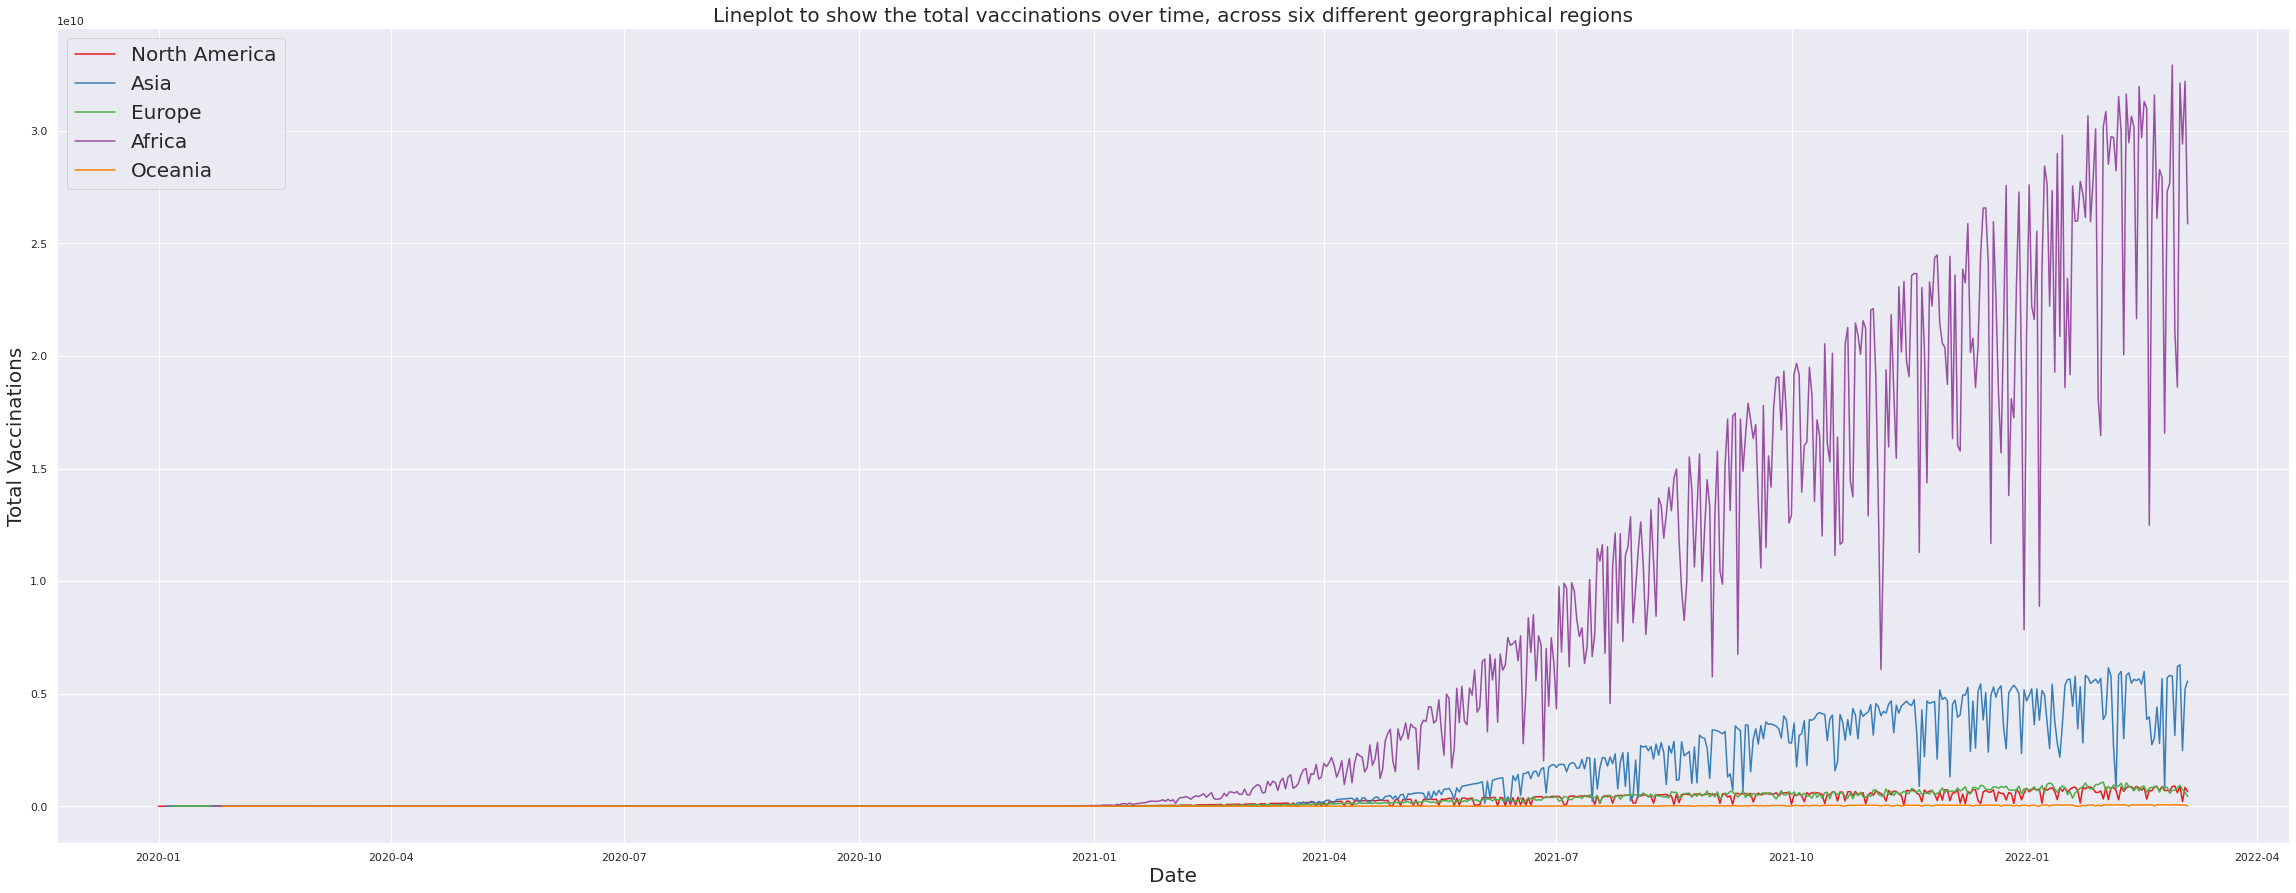

In [46]:
# Create datetime column for plotting through time.
df['datetime_date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Create list of interesting locations 
regions = ["Africa", "Asia", "Europe", "North America", "Oceania", "World"]
temp_data = df[df['Continent'].isin(regions)]

# Initiate figure and plot
fig, ax = plt.subplots(figsize = (40,15))
ax = sns.lineplot(data=temp_data, x="datetime_date", y="total vaccinations", hue="Continent")

# Axis and formatting
ax.set_title("Lineplot to show the total vaccinations over time, across six different georgraphical regions", fontsize = 20)
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Total Vaccinations", fontsize = 20)

ax.legend(loc="best", fontsize=20)

In [66]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


confirmed = df.groupby('Date').sum()['Total_Cases'].reset_index()
Deaths = df.groupby('Date').sum()['Total_deaths'].reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Total_Cases'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=Deaths['Date'],
                y=Deaths['Total_deaths'],
                name='Deaths',
                marker_color='Red'
                ))


fig.update_layout(
    title='Worldwide Corona Virus Cases - Confirmed, Deaths (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()